In [102]:
import pandas as pd

In [103]:
data = pd.read_csv(r'data\51st Bisons vs CNF Rd 1\Plane\Allies_PlaneId_10C.csv', usecols=['Unix time', 'Roll', 'Pitch', 'Yaw', 'Longitude', 'Latitude','Altitude'])
# 设置 Unix time 为 index，并且保留这一列
data.set_index('Unix time', inplace=True, drop=False)
data.head()

,Unix time,Longitude,Latitude,Altitude,Roll,Pitch,Yaw
Unix time,,,,,,,
97,97,56.383311,27.233165,9.47,-0.2,-0.1,144.1
98,98,56.383312,27.233165,9.51,-0.3,-0.4,144.0
99,99,56.383312,27.233165,9.53,-0.2,-0.5,144.0
100,100,56.383312,27.233165,9.54,-0.2,-0.6,144.0
101,101,56.383312,27.233165,9.54,-0.2,-0.7,144.0


In [104]:
times_ = []
# 阈值
threshold = 110
for i in range(len(data) - 1):
    # 计算两两横滚角的差值
    temp = data.iloc[i+1]['Roll'] - data.iloc[i]['Roll']
    if abs(temp) > threshold:
        times_.append([data.iloc[i-1]['Unix time'], data.iloc[i]['Unix time'], data.iloc[i+1]['Unix time'], data.iloc[i+2]['Unix time']])

flag = []
times_
for i in range(len(times_)):
    flag.append(i)

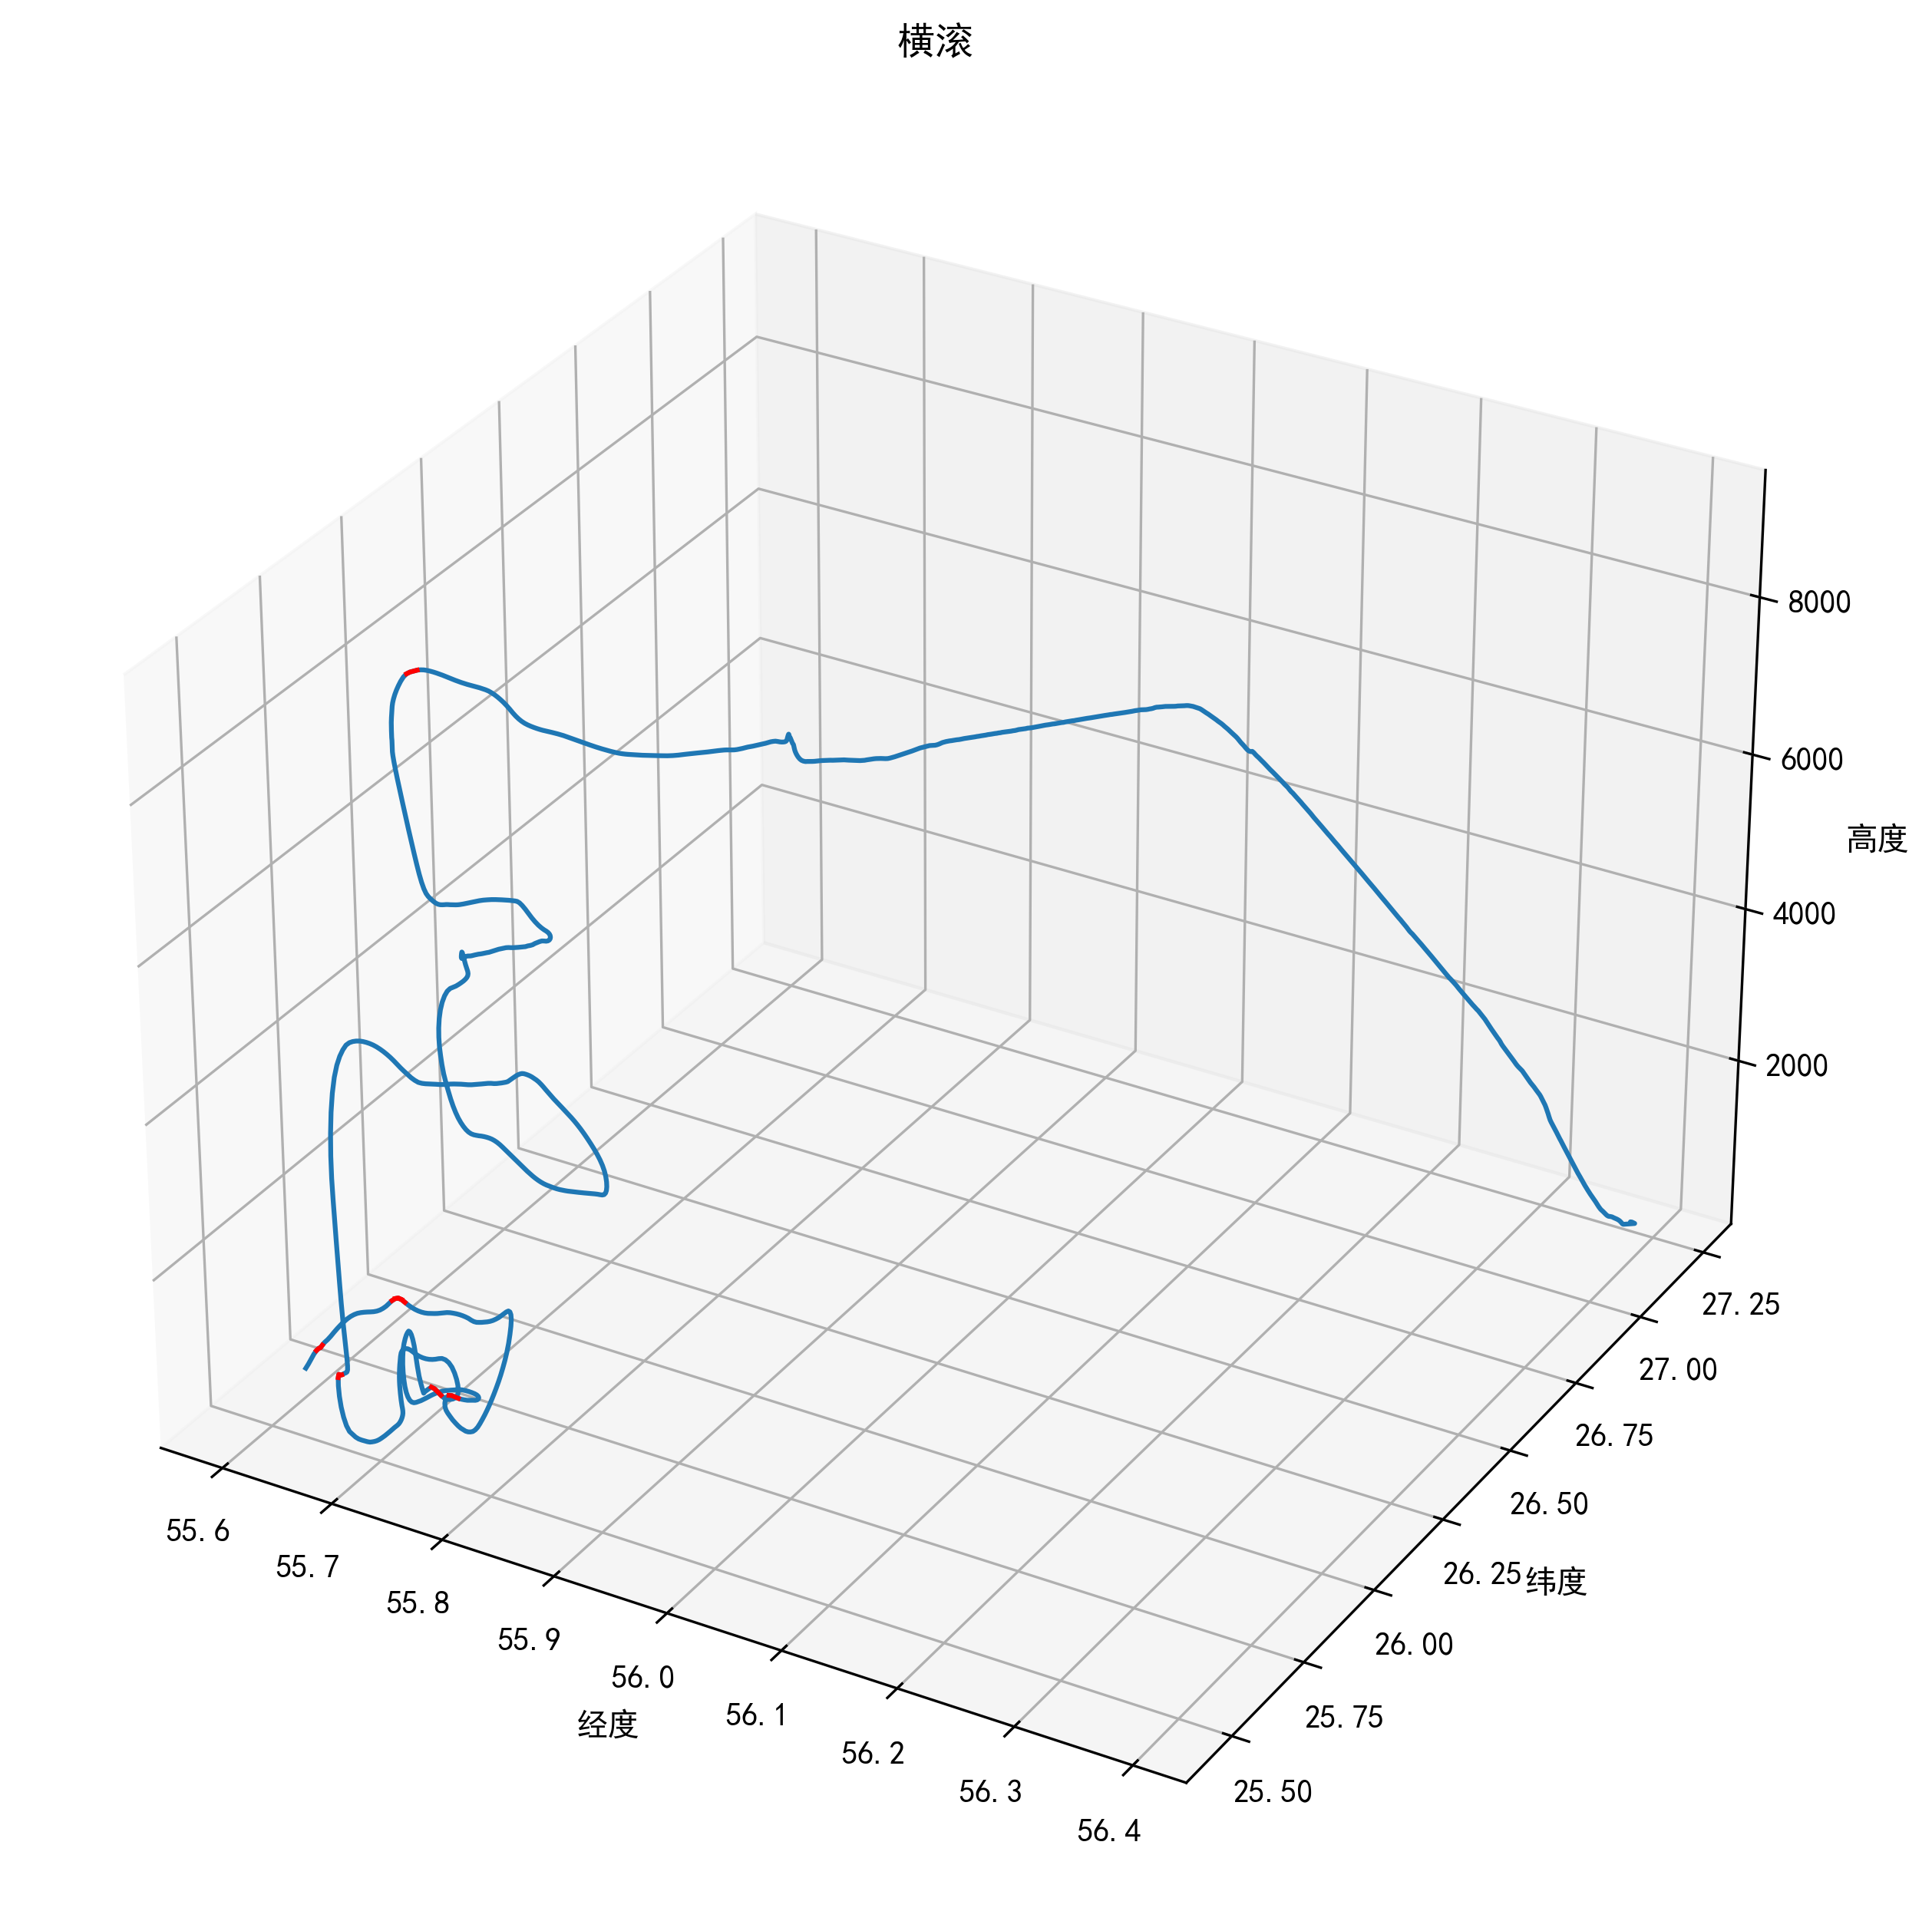

[[55.7119491, 55.7095914, 55.7071189, 55.7048091],
 [55.6695457, 55.6690218, 55.6686581, 55.6688833],
 [55.7299015, 55.7272201, 55.7245504, 55.7220168],
 [55.7384904, 55.735997, 55.7335557, 55.7315284],
 [55.6889726, 55.6859488, 55.6829875, 55.679989],
 [55.6859488, 55.6829875, 55.679989, 55.6770164],
 [55.6134495, 55.6124705, 55.6114799, 55.6100223]]

In [105]:
# 获取经度、维度、高度
longitude = []
latitude = []
altitude = []
for i in range(len(data['Longitude'].to_list())):
    longitude.append(data['Longitude'].to_list()[i])
    latitude.append(data['Latitude'].to_list()[i])
    altitude.append(data['Altitude'].to_list()[i])


longitude1 = []
latitude1 = []
altitude1 = []
for i in range(len(flag)):
    temp_long = []
    temp_lat = []
    temp_alt = []
    for j in range(len(times_[flag[i]])):
        temp_long.append(data.loc[times_[flag[i]][j]]['Longitude'])
        temp_lat.append(data.loc[times_[flag[i]][j]]['Latitude'])
        temp_alt.append(data.loc[times_[flag[i]][j]]['Altitude'])
    longitude1.append(temp_long)
    latitude1.append(temp_lat)
    altitude1.append(temp_alt)




# 绘制三维轨迹图
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(longitude, latitude, altitude)
# 绘制在同一张图上一条红线
for i in range(len(longitude1)):
    ax.plot(longitude1[i], latitude1[i], altitude1[i], color='r')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
ax.set_xlabel('经度')
ax.set_ylabel('纬度')
ax.set_zlabel('高度')

# 设置DPI为300
fig.set_dpi(300)
# 设置图片大小
fig.set_size_inches(18.5, 10.5)
# 设置标题
plt.title('横滚')
# 保存图片
plt.savefig('./fig/横滚.png', dpi=300)
plt.show()
longitude1 
